In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import (
    AdaBoostClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import (
    ElasticNet,
    Lasso,
    LassoLars,
    LinearRegression,
    PoissonRegressor,
    SGDClassifier,
)
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Оптимизация гиперпараметров

Цель работы
Познакомиться с оптимизацией гиперпараметров


**Содержание работы**

-   Сгенерировать датасет для задачи бинарной классификации с использованием функции make_classification.
-   Построить и оценить качество различных моделей классификации, используя метрики accuracy и F1-score.
-   Построить модель elasticnet на данных прогнозирования продаж.
-   Оптимизировать гиперпараметры данной модели с помощью поиска по сетке.


**Методические указания**

Простой выбор модели


Сгенерируем матрицу признаков и вектор целей для задачи классификации. Для этого воспользуемся библиотечной функцией make_classification, которая генерирует случайное распределение по заданным параметрам. Число генерируемых точек данных зададим равным 1000, количество признаков - 5. Классов у нас будет два.


In [3]:
X, Y = make_classification(
    n_samples=1000, n_classes=2, n_features=5, n_redundant=0, random_state=1
)


Выведем количественные параметры датаета:


In [4]:
X.shape, Y.shape

((1000, 5), (1000,))

В датасете описаны 1000 объектов и у каждого есть 5 признаков.

Разделим данные на обучающую и тестовую части:


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


Выведем количественные параметры тестовой и обучающей выборки:


In [6]:
X_train.shape, y_train.shape

((800, 5), (800,))

In [7]:
X_test.shape, y_test.shape

((200, 5), (200,))

Построение различных моделей классификации


In [8]:
names = [
    "Nearest_Neighbors",
    "Linear_SVM",
    "Polynomial_SVM",
    "RBF_SVM",
    "Gaussian_Process",
    "Gradient_Boosting",
    "Decision_Tree",
    "Extra_Trees",
    "Random_Forest",
    "Neural_Net",
    "AdaBoost",
    "Naive_Bayes",
    "QDA",
    "SGD",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2"),
]


Необходимо сравнить модели друг с другом и выбрать наиболее точные. Обучим модель, примените модель к тестовым данным и запишите показатели точности.


In [9]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)


c:\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Анализ производительности модели

Сформируем DataFrame для наглядного отображения показателя точности


In [10]:
df = pd.DataFrame()
df["name"] = names
df["score"] = scores
df.sort_values(by=["score"], ascending=False, inplace=True)
df


,name,score
4,Gaussian_Process,0.855
9,Neural_Net,0.855
0,Nearest_Neighbors,0.850
8,Random_Forest,0.850
5,Gradient_Boosting,0.845
10,AdaBoost,0.845
6,Decision_Tree,0.835
11,Naive_Bayes,0.835
12,QDA,0.835
1,Linear_SVM,0.830


In [11]:
cm = sns.light_palette("green", as_cmap=True)

s = df.style.background_gradient(cmap=cm)
s


,name,score
4,Gaussian_Process,0.855000
9,Neural_Net,0.855000
0,Nearest_Neighbors,0.850000
8,Random_Forest,0.850000
5,Gradient_Boosting,0.845000
10,AdaBoost,0.845000
6,Decision_Tree,0.835000
11,Naive_Bayes,0.835000
12,QDA,0.835000
1,Linear_SVM,0.830000


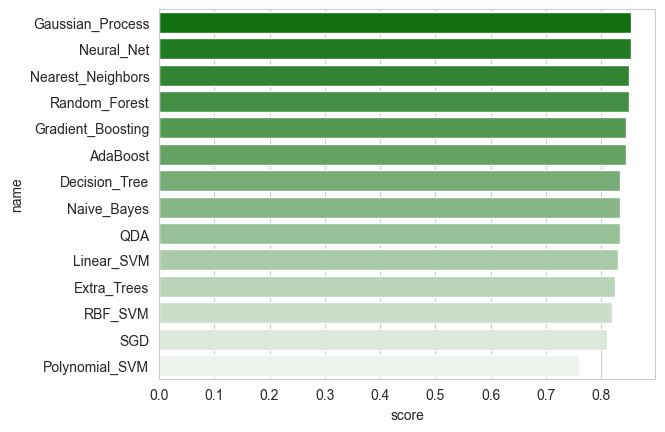

In [17]:
sns.set_style("whitegrid")
pal = sns.light_palette("green", n_colors=len(df), reverse=True)
ax = sns.barplot(
    y="name",
    x="score",
    hue="name",
    legend=False,
    data=df,
    palette=pal,
)

Рассмотрим как мы можем оптимизировать методы. Для этого выберем метод Grid Search. И раасмотрим пример на основе данных затрат на рекламу.


Рассмотрим реализацию для оптимизации производительности метода машинного обучения с помощью Grid Search.


Настройка гиперпараметров важна для правильной работы моделей машинного обучения (ML). Grid Search, является базовым методом для оптимизации гиперпараметров. Данный метод рассматривает некоторые комбинации гиперпараметров и выбирает ту, которая дает более низкий балл ошибки.


Поиск по сетке
Мы можем перебирать комбинации гиперпараметров с помощью поиска по сетке (grid). Линейные модели достаточно просты, и у них даже есть свои специализированные версии поиска значений параметров. Но также можно использовать обобщённый метод поиска по сетке - grid search. Этот метод применим для любой модели в sklearn, и он пригодится нам позже для более сложных моделей.


Мы будем использовать данные из книги ISLR (Introduction to Statistical Learning: With Applications in R). Это будут продажи определённого продукта (в тысячах единиц), как функция от бюджета рекламы на ТВ, радио и в газетах (в тысячах долларов). Наша задача исследовать на сколько реклама влияет на продажу товаров. Если мы выясним что никакой связи нет, то тогда не стоит тратить деньги на рекламу. Мы хотели бы увидеть чем больше тратится денег на рекламу тем больше продаются товары.


In [18]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML4.5%20hyperparameters/Advertising.csv"
)


Посмотрим на данные, видим кол-во денег, потраченное на рекламу, отдельно на TV, radio, newspaper, за некоторый период времени, например за неделю. Sales объем продаж товаров, за тот же самый период времени.


In [19]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Далее разобьем данные на признаки и целевую переменную. Признаки это все колонки кроме целевой переменной, один из способов быстро получить все эти колонки df.drop('sales',axis=1). Все признаки измеряются в одних и тех же единицах измерения.


Библиотека Python sklearn предлагает нам функцию StandardScaler() для стандартизации значений данных в стандартный формат. В соответствии с приведенным ниже синтаксисом мы изначально создаем объект функции StandardScaler(). Далее используем fit_transform() вместе с присвоенным объектом для преобразования данных и их стандартизации.


In [20]:
## Создаём X и y
X = df.drop("sales", axis=1)
y = df["sales"]

# Разбиение на обучающий и тестовый наборы - TRAIN TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)

# Масштабирование данных (SCALE)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


ElasticNet это популярный тип регуляризованной линейной регрессии, который сочетает в себе два популярных штрафа, а именно штрафные функции L1 и L2.


В модели ElasticNet есть два парамера L1_ratio он задает соотношение между Lasso регрессией и Ridg регрессией, второй параметр alfa - отвечает за то на сколько сильно мы применяем штрафное слагаемое для регуляризации. Задача состоит в том что бы найти такие параметры alfa и L1_ratio которые будут оптимальными.


Значения гиперпараметров будем искать используя готовый класс Grid SearchCV.

Этот поиск состоит из следующих составляющих:

функция оценки - estimator (рregressor или classifier, например sklearn.svm.SVC());
пространство параметров;
метод поиска или сэмплирования кандидатов;
схема кросс-валидации
функция оценки (score function).
Cоздадим экземпляр модели ElasticNet() со значениями по умолчанию.


In [21]:
base_elastic_model = ElasticNet()

Создаем переменную param_grid это будет словарь в котором укажем возможные значения гиперпараметров которые хотим исследовать


In [22]:
param_grid = {
    "alpha": [0.1, 1, 5, 10, 50, 100],
    "l1_ratio": [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
}


Мы создали сетку с возможными значениями гиперпараметров.

Далее выполним поиск по сетке, для этого импортируем GridSearchCV


Укажем параметры для GridSearchCV.

Существуют следующие параметры:
- estimator
- param_grid
- scoring=None
- n_jobs=None
- refit=True
- cv=None
- verbose=0
- pre_dispatch='2n_jobs'
- error_score=nan
- return_train_score=False


In [25]:
# число verbose выбирайте сами
grid_model = GridSearchCV(
    estimator=base_elastic_model,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=1,
)


In [26]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

Посмотреть какая модель получилась наилучшая:


In [27]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1)

Видим ElasticNet с параметрами. Это наилучшая комбинация гиперпараметров

Если параметры нас устраивают переходим к созданию модели


In [28]:
y_pred = grid_model.predict(X_test)

И вычисляем метрики


In [29]:
mean_squared_error(y_test, y_pred)

2.387342642087474

---
## Дополнительные задания

1. При выборе модели мы обычно выбираем ту, которая дает наибольшее значение какой-то метрики. Но это означает, что эта оценка метрики уже становится завышенной. Поэтому для объективной оценки качества модели ее опять следует оценить на новом наборе данных. Поэтому для выбора модели нужно разделить выборку на три части - обучающую, валидационную и тестовую. Повторите первую часть работы, но с таким разбиением и получите несмещенную оценку качества наилучшей модели.

In [33]:
# Возьмем данные из первой части, где выбирали модель
X, Y = make_classification(
    n_samples=1000, n_classes=2, n_features=5, n_redundant=0, random_state=1
)

In [34]:
# Сначала возьмем 10% как валидационную выборку
X, X_val, y, y_val = train_test_split(X, Y, test_size=0.1, stratify=Y)

# Оставшуюся часть разделим на обучающую и валидационную
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, stratify=y
)


In [35]:
scores = []
# Построим оценку точности всех моделей
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)


c:\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [38]:
df = pd.DataFrame()
df["name"] = names
df["score"] = scores
df.sort_values(by=["score"], ascending=False, inplace=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
8,Random_Forest,0.865278
4,Gaussian_Process,0.855556
9,Neural_Net,0.851389
11,Naive_Bayes,0.848611
7,Extra_Trees,0.843056
1,Linear_SVM,0.838889
12,QDA,0.836111
5,Gradient_Boosting,0.826389
10,AdaBoost,0.819444
6,Decision_Tree,0.816667


Лучшая модель - рандомный лес, точность - 0.86

Оценим ее на валидационном датасете

In [40]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
score = clf.score(X_val, y_val)

# Несмещенная оценка качества наилучшей модели.
print(f"Точность на валидационном датасете: {score}")

Точность на валидационном датасете: 0.83


---
2. Оптимизируйте гиперпараметры той же модели, но другим методом - случайным поиском. Сравните полученные результаты.

Возьмем данные из второй части, где работали с параметрами гиппер модели

In [41]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML4.5%20hyperparameters/Advertising.csv"
)

In [42]:
## Создаём X и y
X = df.drop("sales", axis=1)
y = df["sales"]

# Разбиение на обучающий и тестовый наборы - TRAIN TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)

# Масштабирование данных (SCALE)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [73]:
param_dist = {
    "alpha": np.arange(10),
    "l1_ratio": np.arange(0.1, 10, 0.2) / np.arange(100).sum(),
    # "l1_ratio": uniform(0, 1),
}

In [74]:
base_elastic_model = ElasticNet()
grid_model = RandomizedSearchCV(
    param_distributions=param_dist,
    estimator=base_elastic_model,
    scoring="neg_mean_squared_error",
    n_iter=100
)


In [75]:
grid_model.fit(X_train, y_train)

c:\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.689e+02, tolerance: 2.817e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.en

RandomizedSearchCV(estimator=ElasticNet(), n_iter=100,
                   param_distributions={'alpha': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'l1_ratio': array([2.02020202e-05, 6.06060606e-05, 1.01010101e-04, 1.41414141e-04,
       1.81818182e-04, 2.22222222e-04, 2.62626263e-04, 3.03030303e-04,
       3.43434343e-04, 3.83838384e-04, 4.24242424e-04, 4.64646465e-04,
       5.05050505e-04, 5.45454545e-04, 5.85858586e...
       1.15151515e-03, 1.19191919e-03, 1.23232323e-03, 1.27272727e-03,
       1.31313131e-03, 1.35353535e-03, 1.39393939e-03, 1.43434343e-03,
       1.47474747e-03, 1.51515152e-03, 1.55555556e-03, 1.59595960e-03,
       1.63636364e-03, 1.67676768e-03, 1.71717172e-03, 1.75757576e-03,
       1.79797980e-03, 1.83838384e-03, 1.87878788e-03, 1.91919192e-03,
       1.95959596e-03, 2.00000000e-03])},
                   scoring='neg_mean_squared_error')

In [76]:
grid_model.best_estimator_

ElasticNet(alpha=0, l1_ratio=0.00098989898989899)

In [79]:
# Вычисляем метрики модели
y_pred = grid_model.predict(X_test)
mean_squared_error(y_test, y_pred)


2.2987166978863813

Используя рандомный поиск мы получили немного более точную модель\
2.2987 < 2.387

---
3. Во второй задаче найдите наиболее эффективный класс моделей, а затем оптимизируйте гиперпараметры у этой модели.\
Сравните, насколько лучше получилась модель.


In [91]:
model_types = np.array([
    ["ElasticNet",ElasticNet],
    ["KNeighborsRegressor",KNeighborsRegressor],
    ["Lasso",Lasso],
    ["LassoLars",LassoLars],
    ["LinearRegression",LinearRegression],
    ["PoissonRegressor",PoissonRegressor],
])

In [92]:
scores = []
for name, reg in model_types:
    model = reg().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    scores.append(score)


In [93]:
df = pd.DataFrame()
df["name"] = model_types[:, 0]
df["score"] = scores
df.sort_values(by=["score"], ascending=False, inplace=True)
sns.set_style("whitegrid")

cm = sns.light_palette("green", as_cmap=True)

s = df.style.background_gradient(cmap=cm)
s

,name,score
1,KNeighborsRegressor,0.932720
5,PoissonRegressor,0.928729
4,LinearRegression,0.918578
2,Lasso,0.826626
3,LassoLars,0.826626
0,ElasticNet,0.733062


Лучшая модель - KNeighborsRegressor - имеет точность 0.933

Делаем поиск по сетке меняя максимальную количество соседей

In [94]:
param_grid = {
    "n_neighbors": range(1, 40),
}

In [96]:
model = KNeighborsRegressor()

In [97]:
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="r2",
    cv=3,
    verbose=1,
)

In [98]:
grid_model.fit(X_train, y_train)

Fitting 3 folds for each of 39 candidates, totalling 117 fits


GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 40)}, scoring='r2', verbose=1)

In [99]:
grid_model.best_estimator_

KNeighborsRegressor(n_neighbors=4)

Лучше всего показала себя модель с 4-мя сосодями

In [100]:
y_pred = grid_model.predict(X_test)
score = r2_score(y_test, y_pred)
score

0.937828741233772

После оптимизации гиппер параметров, модель улучшила точность с `0.933` до `0.938`